In [1]:
import pandas as pd

import klcalculator

In [2]:
features = ['gender', 'AGE', 'POSTCODE', 'blood_group', 'eye_color', 'job']
data = pd.read_csv('our-synthetic.csv')[features]
data = data.fillna('Unemployed')
dataset = list(zip(*(data[fn].tolist() for fn in features)))

# First 20 rows of the dataset

In [3]:
data[:20]

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,F,99,2649,B-,Brown,"Psychologist, counselling"
1,M,108,1780,A-,Hazel,Personnel officer
2,M,59,2940,B+,Hazel,Tourism officer
3,M,58,2945,B+,Blue,Make
4,M,30,2729,AB-,Brown,Forest/woodland manager
5,M,6,2531,A-,Grey,Unemployed
6,F,104,839,B+,Brown,Youth worker
7,M,11,2901,AB-,Grey,Unemployed
8,F,105,846,A-,Green,Camera operator
9,M,115,2912,A+,Grey,Retail merchandiser


# Available information per field

In [4]:
original_risks = klcalculator.find_risks_for_records(dataset)
klcalculator.display_risks(features, original_risks)

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,0.950303,6.89576,8.7882,3.00353,2.33085,9.73929
1,1.05147,6.96905,14.2311,2.99185,2.31117,9.83883
2,1.05147,6.98322,8.83883,2.97789,2.31117,9.70758
3,1.05147,6.98322,8.72335,2.97789,2.32444,9.77171
4,1.05147,6.85611,11.3243,3.01561,2.33085,9.3485
5,1.05147,6.75137,8.79759,2.99185,2.33236,2.60658
6,0.950303,6.90023,11.2311,2.97789,2.33085,10.0612
7,1.05147,6.75947,6.90239,3.01561,2.33236,2.60658
8,0.950303,6.93653,12.4238,2.99185,2.31098,9.77171
9,1.05147,6.85611,8.72335,2.97996,2.33236,9.32426


# Available information after aggregation (attempt 1)
We keep only the first 2 digits of the postcode.

In [5]:
klcalculator.display_risks(
    features,
    klcalculator.find_risks_for_records(
        klcalculator.aggregate(
            dataset,
            {2: lambda postcode: postcode // 100})))

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,0.950303,6.89576,1.90247,3.00353,2.33085,7.9997
1,1.05147,6.96905,8.54465,2.99185,2.31117,9.83883
2,1.05147,6.98322,1.90079,2.97789,2.31117,9.70758
3,1.05147,6.98322,1.90079,2.97789,2.32444,9.77171
4,1.05147,6.85611,5.34698,3.01561,2.33085,8.48247
5,1.05147,5.72752,2.55628,1.99769,2.33236,2.60658
6,0.950303,6.90023,5.36851,2.97789,2.33085,10.0612
7,1.05147,3.76061,2.37752,1.24317,1.46318,2.60658
8,0.950303,6.93653,5.36851,2.99185,2.31098,9.77171
9,1.05147,6.85611,1.90079,2.97996,2.33236,7.92673


# Available information after aggregation (attempt 2)
We keep only the first 2 digits of the postcode, and only the first letter of the occupation.

In [6]:
final_risks = klcalculator.find_risks_for_records(
    klcalculator.aggregate(
        dataset,
        {
          2: lambda postcode: postcode // 100,  # Keep first 2 digits of postcode
          5: lambda job: job[0]  # Keep first letter of job
        }))
klcalculator.display_risks(
    features,
    final_risks)

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,0.950303,2.55852,1.90247,3.00353,0.744252,2.68771
1,1.05147,6.96905,8.54465,2.99185,2.31117,3.50535
2,1.05147,5.91102,1.90079,2.97789,1.32176,4.12917
3,1.05147,4.0543,1.90079,2.97789,2.32444,4.38644
4,1.05147,6.85611,5.34698,3.01561,2.33085,3.33705
5,1.05147,5.72752,2.55628,1.99769,2.33236,2.60658
6,0.950303,6.90023,5.36851,2.97789,2.33085,10.0612
7,1.05147,3.76061,2.37752,1.24317,1.46318,2.60658
8,0.950303,5.92513,5.36851,2.99185,2.31098,3.44733
9,1.05147,5.3117,1.90079,2.97996,2.33236,2.71011


In [7]:
final_risks = klcalculator.find_risks_for_records(
    klcalculator.aggregate(
        dataset,
        {
          1: lambda age: age // 10,
          5: lambda job: job[0]  # Keep first letter of job
        }),
    feature_priors={
        0: {
            'M': .4,
            'F': .6
        }
    },
    feature_accuracies={
        2: 1
    })
klcalculator.display_risks(
    features,
    final_risks)

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,0.736966,3.50706,7.67803,3.00353,2.33085,3.50535
1,1.32193,3.52638,8.39354,2.99185,2.31117,3.50535
2,1.32193,3.57562,8.83883,2.97789,2.31117,4.12917
3,1.32193,3.57562,7.16275,2.97789,2.32444,4.38644
4,1.32193,3.54684,11.3243,3.01561,2.33085,4.85394
5,1.32193,3.51905,5.38889,2.99185,2.33236,2.60658
6,0.736966,3.52638,11.2311,2.97789,2.33085,10.0612
7,1.32193,3.56803,5.47022,2.00597,2.33236,2.60658
8,0.736966,3.52638,7.87706,2.99185,2.31098,3.44733
9,1.32193,4.26248,8.72335,2.97996,2.33236,4.79756


In [8]:
final_risks = klcalculator.find_risks_for_records(
    klcalculator.aggregate(
        dataset,
        {
          1: lambda age: age // 10,
          5: lambda job: job[0]  # Keep first letter of job
        }),
    feature_priors={
        0: {
            'M': .4,
            'F': .6
        }
    },
    feature_accuracies={
        2: .9
    })
klcalculator.display_risks(
    features,
    final_risks)

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,0.736966,3.50706,6.44937,3.00353,2.33085,3.50535
1,1.32193,3.52638,7.09423,2.99185,2.31117,3.50535
2,1.32193,3.57562,7.48889,2.97789,2.31117,4.12917
3,1.32193,3.57562,5.98571,2.97789,2.32444,4.38644
4,1.32193,3.54684,9.72346,3.01561,2.33085,4.85394
5,1.32193,3.51905,4.43354,2.99185,2.33236,2.60658
6,0.736966,3.52638,9.6397,2.97789,2.33085,10.0612
7,1.32193,3.56803,4.50407,2.00597,2.33236,2.60658
8,0.736966,3.52638,6.6449,2.99185,2.31098,3.44733
9,1.32193,4.26248,7.38518,2.97996,2.33236,4.79756


# Number of individuals by risk level after aggregation

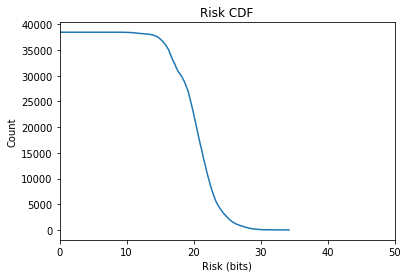

In [9]:
klcalculator.plot_individual_risk_cdf(klcalculator.find_individual_risks(final_risks))

# And before aggregation…

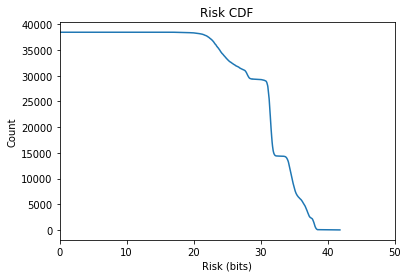

In [10]:
klcalculator.plot_individual_risk_cdf(klcalculator.find_individual_risks(original_risks))

# Compute the $\mathrm{PIF}_{95}$

In [11]:
before = klcalculator.percentile(klcalculator.find_individual_risks(original_risks), 95)
after = klcalculator.percentile(klcalculator.find_individual_risks(final_risks), 95)
print(f'before: {before}')
print(f'after: {after}')

before: 37.81322525649112
after: 25.45522967729736


In [12]:
before = klcalculator.percentile(klcalculator.find_individual_risks(original_risks), 0)
after = klcalculator.percentile(klcalculator.find_individual_risks(final_risks), 0)
print(f'before: {before}')
print(f'after: {after}')

before: 15.884218040918496
after: 9.006187332998685
